In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
# +proj=laea +lat_0=90 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs
import cartopy.crs as ccrs
import cartopy.feature as cfeature
crs_laea = ccrs.LambertAzimuthalEqualArea(central_latitude=90, central_longitude=0)
from cmocean import cm

In [35]:
ifiles = '../NERSC_arctic25km_sea_ice_age_v2p1/zarr/nc/2000/arctic25km_sea_ice_age_v2p1_20000101.nc'
ds = xr.open_dataset(ifiles)
ds

<xarray.Dataset> Size: 12MB
Dimensions:                       (y: 432, x: 432, time: 1, nv: 2)
Coordinates:
  * y                             (y) float64 3kB 5.388e+06 ... -5.388e+06
  * x                             (x) float64 3kB -5.388e+06 ... 5.388e+06
  * time                          (time) datetime64[ns] 8B 2000-01-01T12:00:00
Dimensions without coordinates: nv
Data variables: (12/19)
    Lambert_Azimuthal_Equal_Area  int8 1B ...
    time_bnds                     (time, nv) datetime64[ns] 16B ...
    sea_ice_age                   (time, y, x) float32 746kB ...
    sea_ice_age_uncertainty       (time, y, x) float32 746kB ...
    status_flag                   (time, y, x) int8 187kB ...
    conc_1yi                      (time, y, x) float32 746kB ...
    ...                            ...
    conc_2yi_uncertainty          (time, y, x) float32 746kB ...
    conc_3yi_uncertainty          (time, y, x) float32 746kB ...
    conc_4yi_uncertainty          (time, y, x) float32 746kB ...
    conc_5yi_uncertainty          (time, y, x) float32 746kB ...
    conc_6yi_uncertainty          (time, y, x) float32 746kB ...
    conc_7yi_uncertainty          (time, y, x) float32 746kB ...
Attributes: (12/56)
    title:                      Arctic Sea Ice Age Climate Data Record v2.1
    summary:                    This climate data record of sea ice age is ob...
    iso_topic_category:         oceans,climatologyMeteorologyAtmosphere
    keywords:                   GCMDSK:Earth Science > Cryosphere > Sea Ice >...
    keywords_vocabulary:        GCMDSK:GCMD Science Keywords:https://gcmd.ear...
    geospatial_lat_max:         90.0
    ...                         ...
    dataset_doi:                10.21343/sqvr-rq75
    publisher_name:             Norwegian Meteorological Institute/Arctic Dat...
    publisher_email:            adc-support@met.no
    publisher_url:              https://adc.met.no/
    publisher_institution:      Norwegian Meteorological Institute
    publisher_institution_pid:  https://ror.org/001n36p86

In [36]:
x = ds['x'].values
y = ds['y'].values
sia = ds['sea_ice_age'].squeeze()
concs = []
for i in range(1, 8):
    concs.append(ds[f'conc_{i}yi'].squeeze().values)

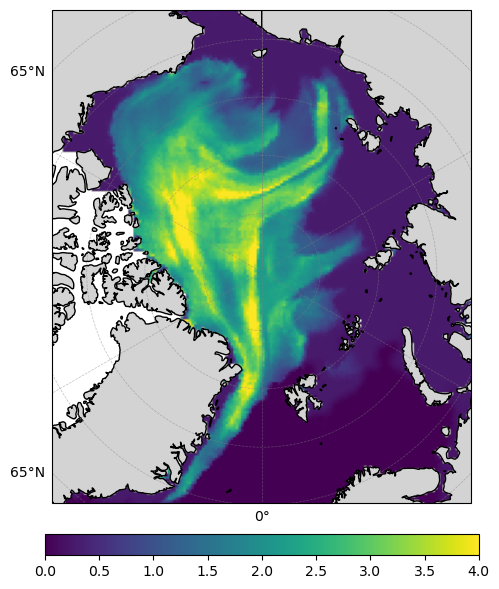

In [61]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection=crs_laea)
plt.imshow(sia, cmap='viridis', vmin=0, vmax=4, extent=(x.min(), x.max(), y.min(), y.max()))
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k', facecolor='lightgray')
ax.set_xlim([-2e6, 2e6])
ax.set_ylim([-2.2e6, 2.5e6])
plt.colorbar(orientation='horizontal', pad=0.05, shrink=0.7)
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
plt.show()

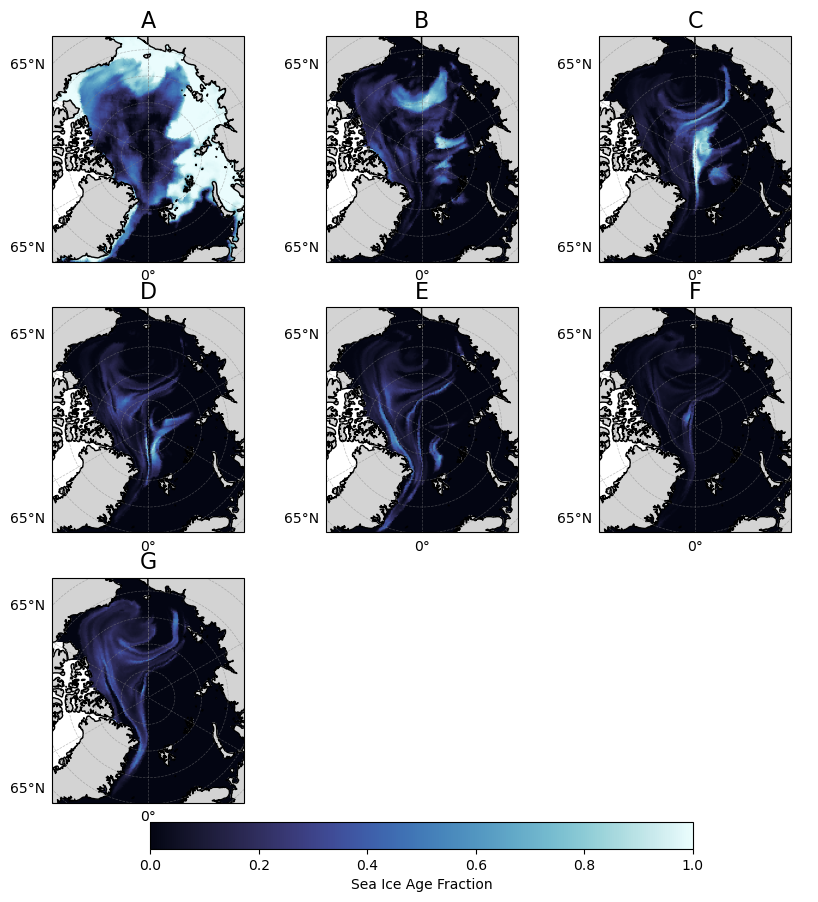

In [62]:
titles = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
fig, axs = plt.subplots(3, 3, figsize=(10, 12), subplot_kw={'projection': crs_laea})
for i, ax in enumerate(axs.flat[:-2]):
    im = ax.imshow(concs[i], cmap=cm.ice, vmin=0, vmax=1, extent=(x.min(), x.max(), y.min(), y.max()))
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k', facecolor='lightgray')
    ax.set_xlim([-2e6, 2e6])
    ax.set_ylim([-2.2e6, 2.5e6])
    ax.set_title(titles[i], fontdict={'fontsize': 16})
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
fig.colorbar(im, ax=axs.ravel().tolist(), orientation='horizontal', pad=0.02, shrink=0.7, label='Sea Ice Age Fraction')
axs.flat[-2].axis('off')
axs.flat[-1].axis('off')
plt.show()

In [52]:
concs = np.array(concs)

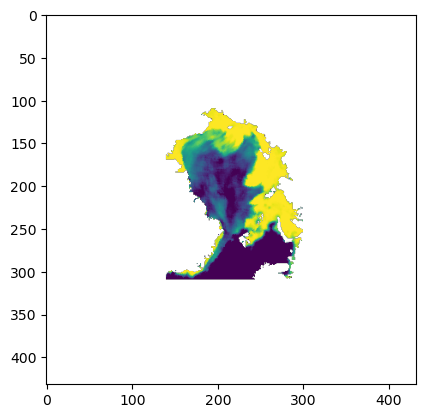

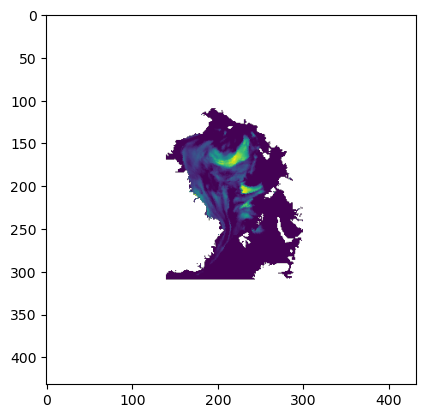

In [55]:
plt.imshow(concs[0]);plt.show()
plt.imshow(concs[1]);plt.show()

In [56]:
myi_advected =  np.cumsum(concs[::-1], axis=0)[::-1]

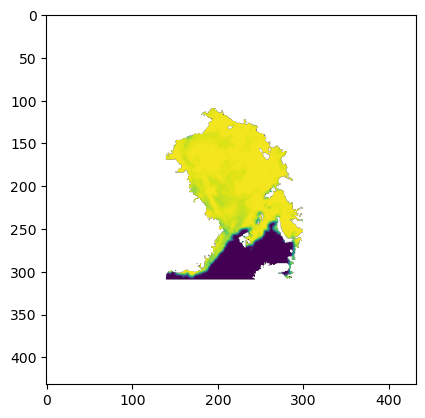

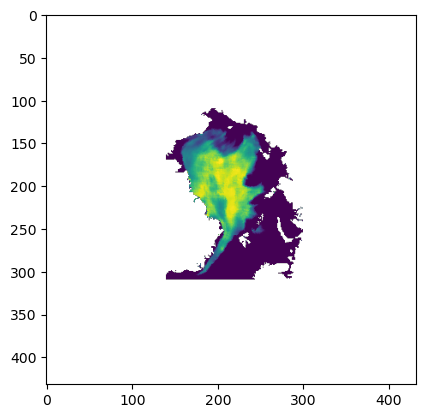

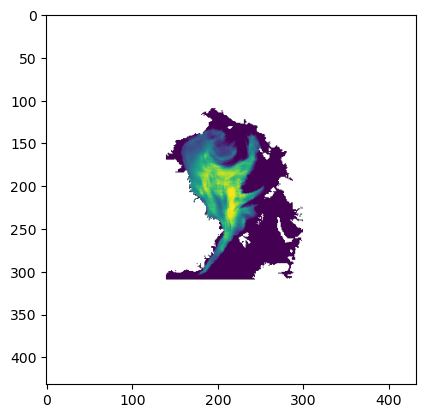

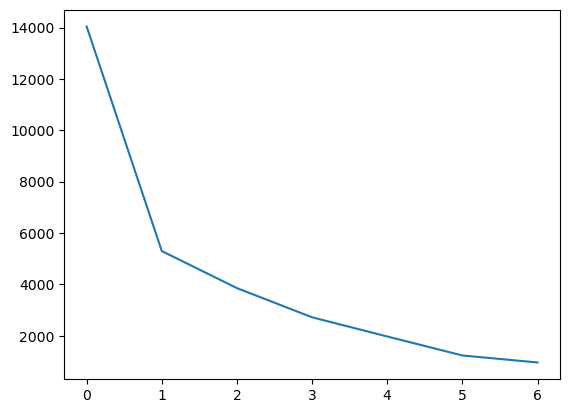

In [59]:
plt.imshow(myi_advected[0]);plt.show()
plt.imshow(myi_advected[1]);plt.show()
plt.imshow(myi_advected[2]);plt.show()
plt.plot(np.nansum(myi_advected, axis=(1,2)))